# Do Jockeys have a significant impact on the performance of a horse? (Z- Scores)

This notebook will continue from our earlier exploration of the SCMP data and try to actually answer the research question above based on normalized results. Giving every jockey and horse its own z-score, we'll compare jockeys to each other, as well as compare how well a jockey performs on a horse compared to that horse's mean in order to determine if jockekys are able to significantly improve their performance. 

I suspect that the more experienced a jockey is, the more likely they'll be able to improve a horse's performance on average. I predict such experienced jockeys will have a small but measurable impact on the horses they race on average. 

## Import

In [3]:
import pandas as pd 
pd.set_option('display.max_columns', 25)
import numpy as np 

from matplotlib.pylab import plt
import seaborn as sns

import os

%matplotlib inline
plt.rcParams.update({'font.size': 14})

In [4]:
hk_analysis = pd.read_csv(os.getcwd() + '\\project_files\\finished_hkhorses.csv')
hk_analysis.shape

(17303, 24)

## Experience Split 

Split the data based on the number of races a jockey has completed as specified below into 'pro' and 'new' jockeys.  This way we can compare the performance of more experienced jockeys with fresh blood, as well as create a set of data that has more races per jockey to help prevent unrepresentative outliers from appearing due to a jockey managing to get one or two good ranks as his only races completed on record. 

In [4]:
min_occurrences = 9 #The lines below will look for jockeys who have completed a number of races greater than this number. 
jockey_count = hk_analysis.jockey.value_counts()

pro_jockeys = hk_analysis[hk_analysis.jockey.isin(jockey_count.index[jockey_count.gt(min_occurrences)])]
new_jockeys = hk_analysis[hk_analysis.jockey.isin(jockey_count.index[~jockey_count.gt(min_occurrences)])]
print("# Pro Jockeys: ", pro_jockeys['jockey'].nunique(), "    # New Jockeys: ", new_jockeys['jockey'].nunique(), \
     "    # All Jockeys: ", hk_analysis['jockey'].nunique())

# Pro Jockeys:  57     # New Jockeys:  85     # All Jockeys:  142


## Creating Jockey Z Scores 

Give every jockey a z-score when compared to the performance of other jockeys.  These scores provide us with a good baseline of how good a jockey is based on more than simply the number of races they've taken part in and will be used later to help weed out which jockeys really know what they're doing.  This extra split will be used to try and give jockeys the best chance possible in how much the best are able to influence the performance of the horses they ride on.  

While not strictly necessary to answer our research question, the z-score for both new and pro jockeys are graphed below to help show the range of data we will be working with for this notebook. 

In [5]:
pivot_all_jockey = hk_analysis[['ID', 'jockey', 'rank']].pivot_table(index='jockey', columns='ID')
pivot_all_jockey = pivot_all_jockey.dropna(axis=1, how='all')

pivot_all_jockey['jockey_mean'] = pivot_all_jockey.mean(axis=1) 
pivot_all_jockey['jockey_z_rating'] = -(pivot_all_jockey['jockey_mean'] - \
                                          pivot_all_jockey['jockey_mean'].mean())/pivot_all_jockey['jockey_mean'].std()

pivot_pro_jockey = pivot_all_jockey[pivot_all_jockey.index.isin(jockey_count.index[jockey_count.gt(min_occurrences)])].copy() #gt = greater than
pivot_pro_jockey = pivot_pro_jockey.dropna(axis=1, how='all') 

pivot_new_jockey = pivot_all_jockey[pivot_all_jockey.index.isin(jockey_count.index[~jockey_count.gt(min_occurrences)])].copy() #gt = greater than
pivot_new_jockey = pivot_new_jockey.dropna(axis=1, how='all')

pivot_pro_jockey.sample(3).dropna(axis=1, how='all')

rank                                                      \
ID                 A005 A007 A010  A023 A025 A030 A031      A036 A040  A041   
jockey                                                                        
R. Bayliss          NaN  NaN  NaN  13.0  NaN  NaN  NaN       NaN  NaN   NaN   
A. Sanna            NaN  NaN  NaN  10.5  7.0  NaN  8.0  5.428571  NaN  11.0   
S. Clipperton  4.583333  6.5  4.2  11.0  NaN  5.0  NaN  1.000000  4.0   NaN   

                              ...                                           \
ID            A045      A049  ... V376 V379      V381 V400 V408  V409 V410   
jockey                        ...                                            
R. Bayliss     NaN       NaN  ...  NaN  NaN       NaN  NaN  NaN  12.0  NaN   
A. Sanna       NaN       NaN  ...  9.0  8.0  3.500000  NaN  8.0   NaN  5.0   
S. Clipperton  9.0  4.166667  ...  NaN  NaN  9.333333  8.0  NaN   NaN  NaN   

                              jockey_mean jockey_z_rating  
ID            V412 V417  V423                              
jockey                                                     
R. Bayliss     NaN  NaN   NaN    8.041126        0.060009  
A. Sanna       NaN  NaN  10.0    8.057540        0.052344  
S. Clipperton  5.0  6.0   NaN    6.926890        0.580347  

[3 rows x 401 columns]

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

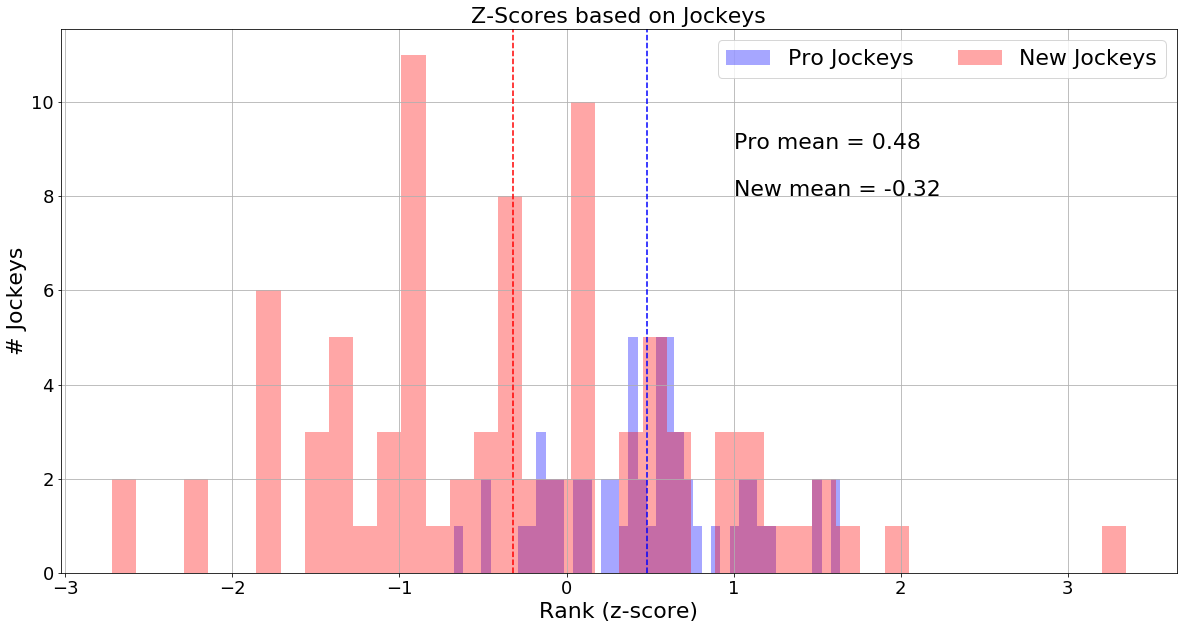

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))

pivot_pro_jockey['jockey_z_rating'].hist(ax=ax, alpha=.35, bins=42, color='blue', label='Pro Jockeys')
pivot_new_jockey['jockey_z_rating'].hist(ax=ax, alpha=.35, bins=42, color='red', label="New Jockeys")

pro_mean = pivot_pro_jockey['jockey_z_rating'].mean()
new_mean = pivot_new_jockey['jockey_z_rating'].mean() 

ax.annotate('Pro mean = {:.2f}'.format(pro_mean), xy=(1, 9), fontsize = 22)
ax.annotate('New mean = {:.2f}'.format(new_mean), xy=(1, 8), fontsize = 22)

ax.axvline(pro_mean, ls='--', c='blue')
ax.axvline(new_mean, ls='--', c='red')

ax.set_title('Z-Scores based on Jockeys', fontsize = 22)
ax.set_xlabel('Rank (z-score)', fontsize = 22)
ax.set_ylabel('# Jockeys', fontsize = 22)
ax.legend(ncol=2, fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [7]:
pivot_all_jockey['jockey_mean'].std()

2.141369934969155

As expected, a quick look at the z scores of 'pro' jockeys compared to 'new' jockeys shows that more experienced jockeys do appear to obtain noticably better ranks than less experienced jockeys. 

## Creating Horse Z Scores 

Record the mean rank of every horse and give them a z-score when compared to the performance of other jockeys.  These scores provide us with a good baseline of how good a horse is and will be crucial later when we judge how much a jockey is able to affect that horse's mean rank. 

In [17]:
pivot_all_jockey_t = pivot_all_jockey.transpose().copy()

pivot_all_jockey_t = pivot_all_jockey_t[:-2]
#Have to drop the last two rows that are the mean and z-scores of each jockey in order to have the groupby below have the same number 
#of values as this dataset. 

pivot_all_jockey_t['horse_mean'] = hk_analysis.groupby('ID').mean()['rank'].values
pivot_all_jockey_t['horse_z_rating'] = -(pivot_all_jockey_t['horse_mean'] - \
                                          pivot_all_jockey_t['horse_mean'].mean())/pivot_all_jockey_t['horse_mean'].std() 

all_cols = list(pivot_all_jockey_t.columns.values)[-2:] + list(pivot_all_jockey_t.columns.values)[:-2]
pivot_all_jockey_t = pivot_all_jockey_t[all_cols] 

pivot_all_jockey_c = pd.concat([pivot_all_jockey_t, pivot_all_jockey.transpose().tail(2).copy()], sort=False) 
#Add back in the two rows we had to remove earlier. 

pivot_all_jockey_c = pivot_all_jockey_c.reindex(np.roll(pivot_all_jockey_c.index, shift=2))

pivot_all_jockey_c.head(4)

horse_mean  horse_z_rating  A de Vries  A. Atzeni  \
                ID                                                        
jockey_mean                  NaN             NaN    8.000000   7.250000   
jockey_z_rating              NaN             NaN    0.079214   0.429457   
rank            A005    5.866667        0.413825         NaN        NaN   
                A006    6.150000        0.305798         NaN        NaN   

                       A. Badel  A. Delpech  A. Hamelin  A. Marcus  A. Sanna  \
                ID                                                             
jockey_mean            7.056439    8.000000   10.000000    1.00000  8.057540   
jockey_z_rating        0.519848    0.079214   -0.854767    3.34815  0.052344   
rank            A005        NaN         NaN         NaN        NaN       NaN   
                A006  10.000000         NaN         NaN        NaN       NaN   

                      A. Starke  A. Suborics   B Shinn  ...  W. C. Marwing  \
                ID                                      ...                  
jockey_mean           10.000000     8.366667  9.000000  ...        9.75000   
jockey_z_rating       -0.854767    -0.092016 -0.387776  ...       -0.73802   
rank            A005        NaN          NaN       NaN  ...            NaN   
                A006        NaN          NaN       NaN  ...            NaN   

                      W. L. Ho  W. Lordan  W. M. Lai   W. Pike   W. Smith  \
                ID                                                          
jockey_mean           9.666667   7.833333   8.749377  8.000000  12.000000   
jockey_z_rating      -0.699104   0.157046  -0.270738  0.079214  -1.788749   
rank            A005       NaN        NaN        NaN       NaN        NaN   
                A006       NaN        NaN        NaN       NaN        NaN   

                      Y. Fukunaga  Y. Iwata  Y. Kawada  Y. T. Cheng   Y. Take  \
                ID                                                              
jockey_mean              4.000000  4.666667    7.50000     6.845294  5.611111   
jockey_z_rating          1.947177  1.635850    0.31271     0.618452  1.194803   
rank            A005          NaN       NaN        NaN          NaN       NaN   
                A006          NaN       NaN        NaN          NaN       NaN   

                      Z. Purton  
                ID               
jockey_mean            4.998634  
jockey_z_rating        1.480824  
rank            A005        NaN  
                A006   6.333333  

[4 rows x 144 columns]

In [18]:
pivot_pro_jockey_c = pivot_all_jockey_c.transpose()[pivot_all_jockey_c.columns.isin(jockey_count.index[jockey_count.gt(min_occurrences)])].copy() #gt = greater than
pivot_new_jockey_c = pivot_all_jockey_c.transpose()[pivot_all_jockey_c.columns.isin(jockey_count.index[~jockey_count.gt(min_occurrences)])].copy() #gt = greater than

pivot_pro_jockey_c = (pivot_pro_jockey_c.dropna(axis=1, how='all')).transpose()
pivot_new_jockey_c = (pivot_new_jockey_c.dropna(axis=1, how='all')).transpose()

pivot_pro_jockey_c[['horse_mean', 'horse_z_rating']] = pivot_all_jockey_c[pivot_all_jockey_c[['horse_mean','horse_z_rating']]\
                                                                          .index.isin(pivot_pro_jockey_c.index)][['horse_mean','horse_z_rating']]
pivot_new_jockey_c[['horse_mean', 'horse_z_rating']] = pivot_all_jockey_c[pivot_all_jockey_c[['horse_mean','horse_z_rating']]\
                                                                          .index.isin(pivot_new_jockey_c.index)][['horse_mean','horse_z_rating']]

pro_cols = list(pivot_pro_jockey_c.columns.values)[-2:] + list(pivot_pro_jockey_c.columns.values)[:-2]
pivot_pro_jockey_c = pivot_pro_jockey_c[pro_cols] 
new_cols = list(pivot_new_jockey_c.columns.values)[-2:] + list(pivot_new_jockey_c.columns.values)[:-2]
pivot_new_jockey_c = pivot_new_jockey_c[new_cols] 

pivot_pro_jockey_c.head(4)

horse_mean  horse_z_rating   A. Badel  A. Sanna  \
                ID                                                      
jockey_mean                  NaN             NaN   7.056439  8.057540   
jockey_z_rating              NaN             NaN   0.519848  0.052344   
rank            A005    5.866667        0.413825        NaN       NaN   
                A006    6.150000        0.305798  10.000000       NaN   

                      A. Suborics  B. Prebble  C. K. Tong  C. Murray  \
                ID                                                     
jockey_mean              8.366667    6.992385    9.242262   8.536195   
jockey_z_rating         -0.092016    0.549761   -0.500911  -0.171184   
rank            A005          NaN         NaN         NaN   9.000000   
                A006          NaN    4.800000         NaN        NaN   

                      C. Reith  C. Schofield  C. Williams   C. Wong  ...  \
                ID                                                   ...   
jockey_mean           8.333333      6.656008     6.703704  6.871585  ...   
jockey_z_rating      -0.076449      0.706846     0.684573  0.606174  ...   
rank            A005       NaN           NaN          NaN       NaN  ...   
                A006       NaN      5.666667          NaN       NaN  ...   

                      S. Clipperton  S. De Sousa  T. Angland  T. Berry  \
                ID                                                       
jockey_mean                6.926890     5.805568    4.974359  6.678959   
jockey_z_rating            0.580347     1.103994    1.492161  0.696128   
rank            A005       4.583333     1.000000         NaN       NaN   
                A006            NaN          NaN         NaN       NaN   

                      T. H. So  U. Rispoli  V. Cheminaud  W. M. Lai  Y. Iwata  \
                ID                                                              
jockey_mean           8.549650    6.711400      9.615385   8.749377  4.666667   
jockey_z_rating      -0.177467    0.680979     -0.675155  -0.270738  1.635850   
rank            A005       NaN         NaN           NaN        NaN       NaN   
                A006       NaN         NaN           NaN        NaN       NaN   

                      Y. T. Cheng   Y. Take  Z. Purton  
                ID                                      
jockey_mean              6.845294  5.611111   4.998634  
jockey_z_rating          0.618452  1.194803   1.480824  
rank            A005          NaN       NaN        NaN  
                A006          NaN       NaN   6.333333  

[4 rows x 59 columns]

Here we take the dataframe we created that contains the horse and jockey data (including means and z scores for both) for all of our data and break it into two separate dataframes in order to be able to continue analyzing them separately. It took a lot of work to create one pivot graph that contains both horse and jockey data, but it'll prove to be worthwhile. 

While not strictly necessary to answer our research question, the z-score for horses are graphed below to help show the range of data we will be working with for this notebook. 

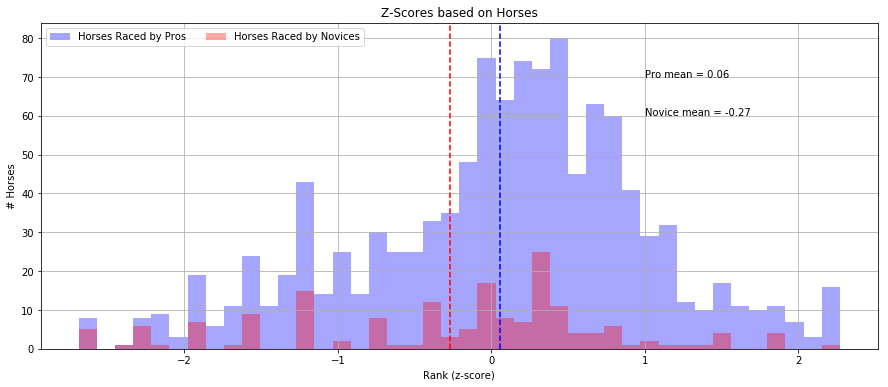

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))

pivot_pro_jockey_c['horse_z_rating'].hist(ax=ax, alpha=.35, bins=42, color='blue', label='Horses Raced by Pros')
pivot_new_jockey_c['horse_z_rating'].hist(ax=ax, alpha=.35, bins=42, color='red', label='Horses Raced by Novices')

pro_horse_mean = pivot_pro_jockey_c['horse_z_rating'].mean()
new_horse_mean = pivot_new_jockey_c['horse_z_rating'].mean()

ax.axvline(pro_horse_mean, ls='--', c='blue')
ax.axvline(new_horse_mean, ls='--', c='red')

ax.annotate('Pro mean = {:.2f}'.format(pro_horse_mean), xy=(1, 70))
ax.annotate('Novice mean = {:.2f}'.format(new_horse_mean), xy=(1, 60))

ax.set_title('Z-Scores based on Horses')
ax.set_xlabel('Rank (z-score)')
ax.set_ylabel('# Horses') 
ax.legend(ncol=2)

This graph shows a similar result to the jockey graph earlier, where horses raced by more experienced jockeys tend to obtain higher ranks than horses that are raced by jockeys who are still learning. It also shows that despite there being fewer 'pro' jockeys, they race a much wider variety of horses. 

## Calculating Impact

In [20]:
threshold=2
#Create a variable here for easy changing of what we want the threshold to be for the minimum number of times a horse appears in this data, to prevent horses with 
#few/one entry to make it appear that jockeys had no impact. 

z_impact_pro = pivot_pro_jockey.copy()[list(pivot_pro_jockey.columns.values)[:-2]]
z_impact_new = pivot_new_jockey.copy()[list(pivot_new_jockey.columns.values)[:-2]]
#create this dataset as a copy of the original pro/new split minus the jockey mean and z scores

z_impact_pro = z_impact_pro.sub(z_impact_pro.mean(), axis = 1).div(z_impact_pro.std(), axis=1)
z_impact_new = z_impact_new.sub(z_impact_new.mean(), axis = 1).div(z_impact_new.std(), axis=1)

z_impact_pro = z_impact_pro.dropna(axis=1, how='all')
z_impact_pro = z_impact_pro.dropna(axis=1, thresh=threshold)
z_impact_new = z_impact_new.dropna(axis=1, how='all')
z_impact_new = z_impact_new.dropna(axis=1, thresh=threshold)

z_impact_pro.head(4)

rank                                                              \
ID          A005      A006 A007      A009 A010 A011 A012      A022      A023   
jockey                                                                         
A. Badel     NaN  1.246108  NaN       NaN  NaN  NaN  NaN  0.869364 -1.100352   
A. Sanna     NaN       NaN  NaN       NaN  NaN  NaN  NaN       NaN  0.567160   
A. Suborics  NaN       NaN  NaN       NaN  NaN  NaN  NaN       NaN       NaN   
B. Prebble   NaN -0.897931  NaN  0.583083  NaN  NaN  NaN       NaN       NaN   

                                           ...                          \
ID               A024      A025      A030  ... V405     V406      V407   
jockey                                     ...                           
A. Badel          NaN -0.546770       NaN  ...  NaN      NaN -1.542054   
A. Sanna          NaN  1.495879       NaN  ...  NaN      NaN       NaN   
A. Suborics       NaN       NaN       NaN  ...  NaN      NaN       NaN   
B. Prebble  -0.175372       NaN  1.216705  ...  NaN  1.85742  0.828648   

                                                                              \
ID               V408 V409      V410      V412      V414 V417      V423 V617   
jockey                                                                         
A. Badel          NaN  NaN       NaN  0.335681  1.157216  NaN       NaN  NaN   
A. Sanna    -0.150423  NaN -0.251577       NaN       NaN  NaN -0.500777  NaN   
A. Suborics       NaN  NaN       NaN       NaN       NaN  NaN       NaN  NaN   
B. Prebble        NaN  NaN       NaN       NaN       NaN  NaN       NaN  NaN   

                  
ID          V632  
jockey            
A. Badel     NaN  
A. Sanna     NaN  
A. Suborics  NaN  
B. Prebble   NaN  

[4 rows x 946 columns]

Here we calculate a z score for each jockey relative to that horse's mean and standard deviation for all of our data.  This means that every individual horse has its own z score scale from -3 to 3, and we're able to compare the ranks a jockey gets compared to other jockeys on the same horse, showing which jockeys are able to perform abnormally well/poorly compared to the average performance of other jockeys on that same horse. 

(array([ 0.,  2.,  4.,  6.,  8., 10.]), <a list of 6 Text yticklabel objects>)

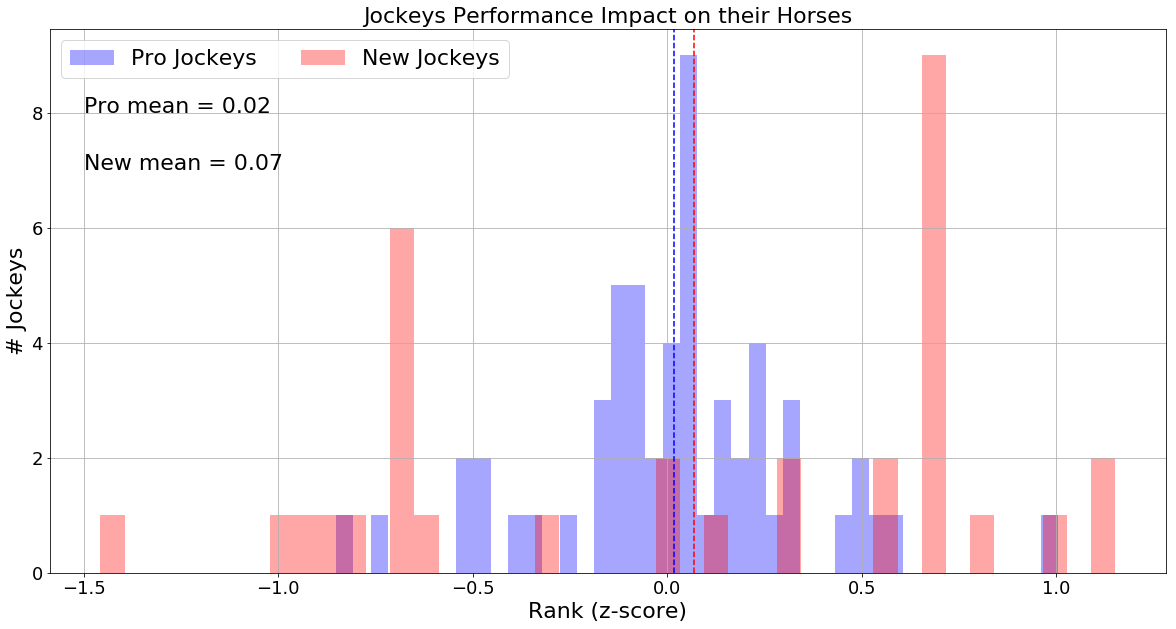

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))

z_impact_pro_means = z_impact_pro.transpose().mean()
z_impact_new_means = z_impact_new.transpose().mean()

z_impact_pro_means.hist(ax=ax, alpha=.35, bins=42, color='blue', label='Pro Jockeys')
z_impact_new_means.hist(ax=ax, alpha=.35, bins=42, color='red', label='New Jockeys')

z_pro_mean = z_impact_pro_means.mean()
z_new_mean = z_impact_new_means.mean() 

ax.axvline(z_pro_mean, ls='--', c='blue')
ax.axvline(z_new_mean, ls='--', c='red')

ax.annotate('Pro mean = {:.2f}'.format(z_pro_mean), xy=(-1.5, 8), fontsize = 22)
ax.annotate('New mean = {:.2f}'.format(z_new_mean), xy=(-1.5, 7), fontsize = 22)

ax.set_title('Jockeys Performance Impact on their Horses', fontsize = 22)
ax.set_xlabel('Rank (z-score)', fontsize = 22)
ax.set_ylabel('# Jockeys', fontsize=22)
ax.legend(ncol=2, fontsize=22) 

plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)

The above graph shows that even experienced jockeys usually have an impressively small influence on the performance of a horse.  That's not to say that jockeys are incapable of making an impact however, as we see some creating differences as much as 1 standard deviation (for reference, the mean standard deviation of a horse raced by 'pros' is in the cell below).  While still capable of being an important factor, its clear that the majority of jockeys are unable to make a notable difference in the performance of a horse. 

In [22]:
pivot_pro_jockey[:-2].std().mean()

2.5210075606035

Create a database with a significantly higher requirement for number of races a jockey has performed to see if the most experienced jockeys we have are at the higher end of the data we've found, or if even they have difficulty on average notably improving a horse's performance. 

In [16]:
top_min = 99

top_jockeys = z_impact_pro[z_impact_pro.index.isin(jockey_count.index[jockey_count.gt(top_min)])]
top_jockeys = top_jockeys.dropna(axis=1, how='all')
top_jockeys.shape

(32, 943)

Text(0, 0.5, '# Jockeys')

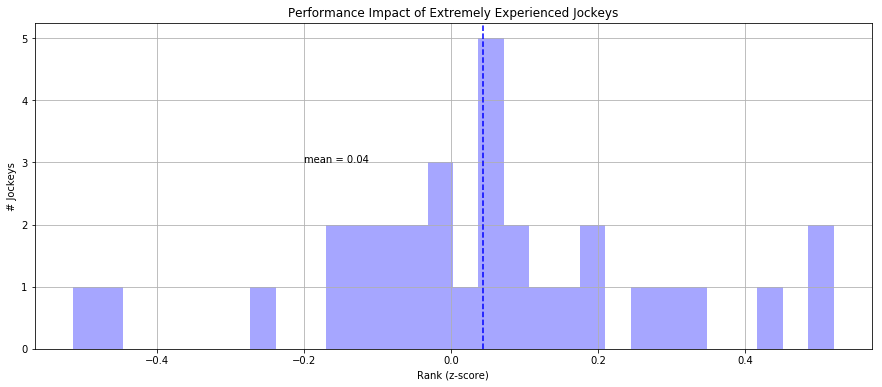

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))

top_jockeys_means = top_jockeys.transpose().mean()

top_jockeys_means.hist(ax=ax, alpha=.35, bins=30, color='blue', label='+100 Jockeys')

top_jockeys_means_mean = top_jockeys_means.mean()

ax.axvline(top_jockeys_means_mean, ls='--', c='blue')

ax.annotate('mean = {:.2f}'.format(top_jockeys_means_mean), xy=(-.2, 3))

ax.set_title('Performance Impact of Extremely Experienced Jockeys')
ax.set_xlabel('Rank (z-score)')
ax.set_ylabel('# Jockeys') 

It's evident that even with extremely experienced jockeys, the average impact a jockey has on a horse is negligable.  Again however, it is important to note that this is not always true, so Jockeys CAN still be an important factor in a race, they just USUALLY are not. 

As a final confirmation, we gather and graph the effect good jockeys can have on either good or bad horses separately, to see at least when a good jockey races a bad horse if they're able to bring up that average, or if a good jockey and a good horse can pair together to go beyond their normal performances.  

In [18]:
max_impact = pivot_pro_jockey_c.copy()
max_impact_positive = pivot_pro_jockey_c.copy()

max_impact = max_impact[max_impact.horse_z_rating <= 0].append(max_impact.loc[['jockey_z_rating'] , : ], sort=False)
max_impact_positive = max_impact_positive[max_impact_positive.horse_z_rating > 0].append(max_impact_positive.loc[['jockey_z_rating'], :], sort=False)

max_impact = max_impact.transpose()
max_impact_positive = max_impact_positive.transpose()

max_impact = max_impact[max_impact.jockey_z_rating >= 0]
max_impact_positive = max_impact_positive[max_impact_positive.jockey_z_rating >= 0]

max_impact = max_impact[list(max_impact.columns.values)[:-2]]
max_impact_positive = max_impact_positive[list(max_impact_positive.columns.values)[:-2]]

max_impact = max_impact.sub(max_impact.mean(), axis = 1).div(max_impact.std(), axis=1)
max_impact_positive = max_impact_positive.sub(max_impact_positive.mean(), axis=1).div(max_impact_positive.std(), axis=1)

threshold=2
#Create a variable here for easy changing of what we want the threshold to be for the minimum number of times a horse 
#appears in this data, to prevent horses with few/one entry to make it appear that jockeys had no impact. 
max_impact = max_impact.dropna(axis=1, how='all')
max_impact = max_impact.dropna(axis=1, thresh=threshold)

max_impact_positive = max_impact_positive.dropna(axis=1, how='all')
max_impact_positive = max_impact_positive.dropna(axis=1, thresh=threshold)

max_impact.head(10)

rank                                                         \
ID                A011      A023      A031      A044      A046 A063      A067   
A. Badel           NaN -1.036275  0.286635       NaN       NaN  NaN  0.604087   
A. Sanna           NaN  0.521466  1.023696       NaN       NaN  NaN  1.124198   
B. Prebble         NaN       NaN       NaN  0.371448       NaN  NaN       NaN   
C. Schofield       NaN  0.651278       NaN -0.697101  0.327327  NaN       NaN   
C. Williams        NaN       NaN       NaN       NaN       NaN  NaN       NaN   
C. Wong       1.351451       NaN       NaN  0.982047       NaN  NaN -0.436135   
C. Y. Ho      0.308226       NaN -1.187488 -0.442685       NaN  NaN       NaN   
D. Lane            NaN       NaN       NaN       NaN       NaN  NaN       NaN   
D. Oliver          NaN       NaN       NaN       NaN       NaN  NaN       NaN   
D. Whyte     -0.640161       NaN       NaN -1.155051  0.654654  NaN       NaN   

                                                                ...            \
ID                A085      A097      A099      A101      A107  ...      V329   
A. Badel           NaN       NaN       NaN       NaN -0.875814  ...       NaN   
A. Sanna     -0.701864  1.877704       NaN       NaN       NaN  ...       NaN   
B. Prebble         NaN       NaN       NaN       NaN       NaN  ...       NaN   
C. Schofield       NaN       NaN       NaN       NaN  0.652452  ...  0.516541   
C. Williams        NaN       NaN       NaN       NaN       NaN  ...       NaN   
C. Wong            NaN -0.330683 -0.707107       NaN       NaN  ...       NaN   
C. Y. Ho      1.395535       NaN       NaN       NaN  1.828042  ...       NaN   
D. Lane            NaN       NaN       NaN       NaN       NaN  ...       NaN   
D. Oliver          NaN       NaN       NaN       NaN       NaN  ...       NaN   
D. Whyte      0.084661  0.221414       NaN  0.327375       NaN  ...       NaN   

                                                                          \
ID                V341      V358      V367      V368      V378      V379   
A. Badel           NaN       NaN  0.714568       NaN       NaN       NaN   
A. Sanna           NaN  0.422189       NaN       NaN       NaN  0.231271   
B. Prebble         NaN       NaN  1.414236       NaN       NaN       NaN   
C. Schofield  1.370137       NaN -0.399718       NaN -1.311118 -0.262706   
C. Williams        NaN       NaN       NaN       NaN       NaN       NaN   
C. Wong            NaN -1.946457       NaN       NaN       NaN       NaN   
C. Y. Ho      0.632843  1.606512  1.414236 -0.834275  1.252474  0.725248   
D. Lane            NaN       NaN       NaN       NaN       NaN  1.219225   
D. Oliver          NaN       NaN       NaN       NaN       NaN       NaN   
D. Whyte      0.632843       NaN -0.140581       NaN       NaN       NaN   

                                                                
ID                V381      V406      V408      V409      V423  
A. Badel           NaN       NaN       NaN       NaN       NaN  
A. Sanna     -1.081980       NaN  0.013686       NaN -0.053149  
B. Prebble         NaN  2.031390       NaN       NaN       NaN  
C. Schofield       NaN -0.540101  0.385611  0.802145       NaN  
C. Williams        NaN       NaN       NaN       NaN       NaN  
C. Wong            NaN       NaN       NaN       NaN       NaN  
C. Y. Ho      0.728848       NaN  2.245236       NaN       NaN  
D. Lane            NaN       NaN       NaN       NaN       NaN  
D. Oliver     1.375572       NaN       NaN       NaN       NaN  
D. Whyte      0.599503       NaN       NaN       NaN       NaN  

[10 rows x 334 columns]

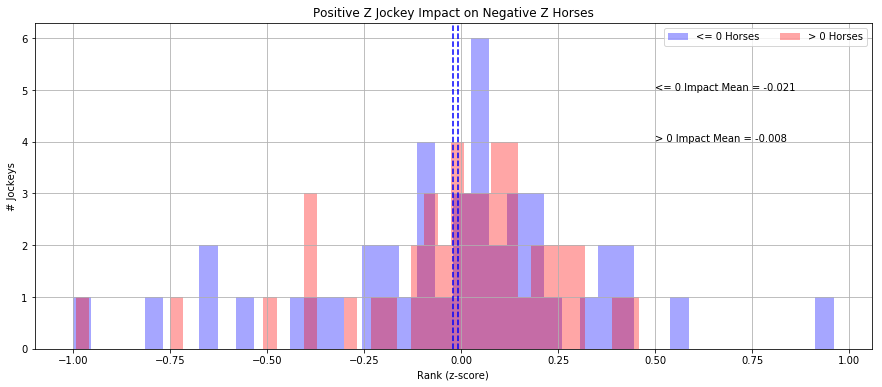

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))

impact_means = max_impact.transpose().mean()
impact_means_positive = max_impact_positive.transpose().mean()

impact_means.hist(ax=ax, alpha=.35, bins=42, color='blue', label='<= 0 Horses')
impact_means_positive.hist(ax=ax, alpha=.35, bins=42, color='red', label='> 0 Horses')

impact_means_mean = impact_means.mean()
impact_means_positive_mean = impact_means_positive.mean()

ax.axvline(impact_means_mean, ls='--', c='blue')
ax.axvline(impact_means_positive_mean, ls='--', c='blue')

ax.annotate('<= 0 Impact Mean = {:.3f}'.format(impact_means_mean), xy=(0.5, 5))
ax.annotate('> 0 Impact Mean = {:.3f}'.format(impact_means_positive_mean), xy=(0.5, 4))

ax.set_title('Positive Z Jockey Impact on Negative Z Horses')
ax.set_xlabel('Rank (z-score)')
ax.set_ylabel('# Jockeys') 
ax.legend(ncol=2)

In [20]:
print("<= 0 Horses STD Mean: ", pivot_pro_jockey_c[pivot_pro_jockey_c.horse_z_rating <= 0].transpose().std().mean(), \
      "    > 0 Horses STD Mean: ", pivot_pro_jockey_c[pivot_pro_jockey_c.horse_z_rating > 0].transpose().std().mean())
#Had to have some obtuse code here to get the mean standard deviation sadly

<= 0 Horses STD Mean:  4.931578545482607     > 0 Horses STD Mean:  2.7093007041041997


Our final graph is very much in line with what we have seen thusfar.  While some outlying jockeys are able to make signifcant improvements to the horses they ride, the mean impact is impressively close to 0. 

## Conclusion 

After carefully analyzing the data scraped from SCMP, its clear that jockeys drastically underperformed my expectations. Clearly some jockeys do exist that are able to consistently and noticably improve the performance of the horses they ride on, however these jockeys are the outliers.  On average jockeys are unable to make even a full rank of difference on the horses they ride.  All in all, while what jockeys are particpating in a race should not be ignored by any means, it is not nearly as significant as what horses are in a race. 